# Bank Marketing Data Analysis

### Importing modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Importing the data

<h3>Datasets:</h3>

<ol>
  <li><strong>bank-additional-full.csv</strong>: Contains all examples, ordered by date (from May 2008 to November 2010) including social and economic context attributes.</li>
  <li><strong>bank-additional.csv</strong>: Contains 10% of the examples (4521), randomly selected from <code>bank-additional-full.csv</code>.</li>
    <li><code>bank-full.csv</code> and <code>bank.csv</code>: Similar to the previous datasets but without the social and economic context columns.</li>
</ol>

<p> I will use <code>bank-additional-full.csv</code> for the analysis.</p>

In [2]:
bank_df = pd.read_csv('bank-additional-full.csv')
bank_df.head(5)

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";..."
1,"57;""services"";""married"";""high.school"";""unknown..."
2,"37;""services"";""married"";""high.school"";""no"";""ye..."
3,"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no..."
4,"56;""services"";""married"";""high.school"";""no"";""no..."


In [3]:
bank_df.info

<bound method DataFrame.info of       age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"
0      56;"housemaid";"married";"basic.4y";"no";"no";...                                                                                                                                                                          
1      57;"services";"married";"high.school";"unknown...                                                                                                                                                                          
2      37;"services";"married";"high.school";"no";"ye...                                                                                                                                                                          
3      40;"admin.";"married";"basic.6y";"no";"no";"no...    

The csv file has all values in one column so I need to split it first.

In [4]:
bank_df = bank_df.iloc[:, 0].str.split(';', expand=True)
bank_df.columns = [
    "age", "job", "marital", "education", "default", "housing", "loan", 
    "contact", "month", "day_of_week", "duration", "campaign", "pdays", "previous", "poutcome",
    "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "y"
]
bank_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,"""housemaid""","""married""","""basic.4y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
1,57,"""services""","""married""","""high.school""","""unknown""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
2,37,"""services""","""married""","""high.school""","""no""","""yes""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
3,40,"""admin.""","""married""","""basic.6y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
4,56,"""services""","""married""","""high.school""","""no""","""no""","""yes""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,"""retired""","""married""","""professional.course""","""no""","""yes""","""no""","""cellular""","""nov""","""fri""",...,1,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""yes"""
41184,46,"""blue-collar""","""married""","""professional.course""","""no""","""no""","""no""","""cellular""","""nov""","""fri""",...,1,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""no"""
41185,56,"""retired""","""married""","""university.degree""","""no""","""yes""","""no""","""cellular""","""nov""","""fri""",...,2,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""no"""
41186,44,"""technician""","""married""","""professional.course""","""no""","""no""","""no""","""cellular""","""nov""","""fri""",...,1,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""yes"""


The dataset contains the correct amount of 21 columns and around 41k rows.<br><br>
Now I can move on to data preparation.

## 2. Data Preparation and Cleaning

First I'll look at the data types and value counts of each column to determine which columns need to be converted.

In [5]:
bank_df.dtypes

age               object
job               object
marital           object
education         object
default           object
housing           object
loan              object
contact           object
month             object
day_of_week       object
duration          object
campaign          object
pdays             object
previous          object
poutcome          object
emp.var.rate      object
cons.price.idx    object
cons.conf.idx     object
euribor3m         object
nr.employed       object
y                 object
dtype: object

All of the columns are objects, some columns need conversion. <br>
Let's check for nulls.

In [6]:
bank_df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

No nulls so let's go over the columns one by one starting with 'age'.

In [7]:
bank_df['age'] = bank_df['age'].astype(int)

bank_df['age'].min()

17

In [8]:
bank_df['age'].max()

98

The 'age' column is converted successfully.<br>
The 'job' column is next.

In [9]:
bank_df['job'].value_counts()

job
"admin."           10422
"blue-collar"       9254
"technician"        6743
"services"          3969
"management"        2924
"retired"           1720
"entrepreneur"      1456
"self-employed"     1421
"housemaid"         1060
"unemployed"        1014
"student"            875
"unknown"            330
Name: count, dtype: int64

Let's drop the quotes, capitalize and change "unknown" to <strong> NaN </strong>, also remove the dot from 'Admin'.

In [10]:
bank_df['job'] = bank_df['job'].str.replace('"', '').str.capitalize()
bank_df['job'] = bank_df['job'].str.replace('.', '')

bank_df['job'].replace('Unknown', np.nan, inplace=True)

bank_df['job'].value_counts()

job
Admin            10422
Blue-collar       9254
Technician        6743
Services          3969
Management        2924
Retired           1720
Entrepreneur      1456
Self-employed     1421
Housemaid         1060
Unemployed        1014
Student            875
Name: count, dtype: int64

In [11]:
bank_df['job'].isna().sum()

330

Good, this will provide consistency and simplified data handling.<br>
Next is 'marital'.

In [12]:
bank_df['marital'].value_counts()

marital
"married"     24928
"single"      11568
"divorced"     4612
"unknown"        80
Name: count, dtype: int64

In [13]:
bank_df['marital'] = bank_df['marital'].str.replace('"', '').str.capitalize()

bank_df['marital'].replace('Unknown', np.nan, inplace=True)

bank_df['marital'].value_counts()

marital
Married     24928
Single      11568
Divorced     4612
Name: count, dtype: int64

Next is 'education'.

In [14]:
bank_df['education'].value_counts()

education
"university.degree"      12168
"high.school"             9515
"basic.9y"                6045
"professional.course"     5243
"basic.4y"                4176
"basic.6y"                2292
"unknown"                 1731
"illiterate"                18
Name: count, dtype: int64

In [15]:
bank_df['education'] = bank_df['education'].str.replace('.', ' ')
bank_df['education'] = bank_df['education'].str.replace('"', '').str.capitalize()

bank_df['education'].replace('Unknown', np.nan, inplace=True)

bank_df['education'].value_counts()

education
University degree      12168
High school             9515
Basic 9y                6045
Professional course     5243
Basic 4y                4176
Basic 6y                2292
Illiterate                18
Name: count, dtype: int64

Next we have 'default'.

In [16]:
bank_df['default'].value_counts()

default
"no"         32588
"unknown"     8597
"yes"            3
Name: count, dtype: int64

Only three values of "yes" so unfortunately this column is essentially useless and can be dropped.

In [17]:
bank_df = bank_df.drop('default', axis = 1)

Next is 'housing'.

In [18]:
bank_df['housing'].value_counts()

housing
"yes"        21576
"no"         18622
"unknown"      990
Name: count, dtype: int64

I will encode 'no' as 0, 'yes' as 1 and again replace 'unknown' with <strong> NaN </strong>.

In [19]:
mapping_dict = {
    '"yes"': 1,
    '"no"': 0,
    '"unknown"': np.nan
}

bank_df['housing'] = bank_df['housing'].replace(mapping_dict)

bank_df['housing'].value_counts()

housing
1.0    21576
0.0    18622
Name: count, dtype: int64

Next is 'loan'.

In [20]:
bank_df['loan'].value_counts()

loan
"no"         33950
"yes"         6248
"unknown"      990
Name: count, dtype: int64

Using the same mapping as before.

In [21]:
bank_df['loan'] = bank_df['loan'].replace(mapping_dict)

bank_df['loan'].value_counts()

loan
0.0    33950
1.0     6248
Name: count, dtype: int64

Next is 'contact'.

In [22]:
bank_df['contact'].value_counts()

contact
"cellular"     26144
"telephone"    15044
Name: count, dtype: int64

In [23]:
bank_df['contact'] = bank_df['contact'].str.replace('"', '').str.capitalize()

bank_df['contact'].value_counts()

contact
Cellular     26144
Telephone    15044
Name: count, dtype: int64

Next is 'month'.

In [24]:
bank_df['month'].value_counts()

month
"may"    13769
"jul"     7174
"aug"     6178
"jun"     5318
"nov"     4101
"apr"     2632
"oct"      718
"sep"      570
"mar"      546
"dec"      182
Name: count, dtype: int64

In [25]:
bank_df['month'] = bank_df['month'].str.replace('"', '').str.capitalize()
bank_df['month'].value_counts()

month
May    13769
Jul     7174
Aug     6178
Jun     5318
Nov     4101
Apr     2632
Oct      718
Sep      570
Mar      546
Dec      182
Name: count, dtype: int64

It's strange that this dataset was said to contain data for May 2008 to November 2010 and yet does not have values for January and February, however there is nothing we can do about that and will continue with 'day_of_week' next.

In [26]:
bank_df['day_of_week'].value_counts()

day_of_week
"thu"    8623
"mon"    8514
"wed"    8134
"tue"    8090
"fri"    7827
Name: count, dtype: int64

In [27]:
bank_df['day_of_week'] = bank_df['day_of_week'].str.replace('"', '').str.capitalize()
bank_df['day_of_week'].value_counts()

day_of_week
Thu    8623
Mon    8514
Wed    8134
Tue    8090
Fri    7827
Name: count, dtype: int64

Next we have 'duration'.

In [28]:
bank_df['duration'] = bank_df['duration'].astype(float)

all_integers = bank_df['duration'].apply(lambda x: x.is_integer()).all()
all_integers

True

In [29]:
bank_df['duration'] = bank_df['duration'].astype(int)
bank_df['duration'].max()

4918

The 'campaign' column contains the number of contacts performed with this client and needs to be cast as an integer.

In [30]:
bank_df['campaign'] = bank_df['campaign'].astype(int)

Next is 'pdays'. It's the number of days since previous campaign and also needs to be cast as an integer.

In [31]:
bank_df['pdays'] = bank_df['pdays'].astype(int)
top_pday = bank_df['pdays'][bank_df['pdays'] > 20]
top_pday.value_counts().head(5)

pdays
999    39673
22         3
21         2
25         1
26         1
Name: count, dtype: int64

I also noticed that the values go up to 27 and then there's a lot of rows with the value '999' so I'm assuming that is missing data.

In [32]:
bank_df['pdays'].replace(999, np.nan, inplace=True)
bank_df['pdays'].max()

27.0

The 'previous' column contains the number of contacts prior to the last campaign. Integer again.

In [33]:
bank_df['previous'] = bank_df['previous'].astype(int)

In [34]:
bank_df['previous'].value_counts()

previous
0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: count, dtype: int64

Next up is 'poutcome' which is the outcome of the previous campaign.

In [35]:
bank_df['poutcome'].value_counts()

poutcome
"nonexistent"    35563
"failure"         4252
"success"         1373
Name: count, dtype: int64

I will use a similar mapping as before.

In [36]:
mapping_dict2 = {
    '"success"': 1,
    '"failure"': 0,
    '"nonexistent"': np.nan
}

bank_df['poutcome'] = bank_df['poutcome'].replace(mapping_dict2)
bank_df['poutcome'].value_counts()

poutcome
0.0    4252
1.0    1373
Name: count, dtype: int64

The next column 'emp.var.rate' describes quarterly employment variation rate and should be cast as a float.

In [37]:
bank_df['emp.var.rate'] = bank_df['emp.var.rate'].astype(float)

The 'cons.price.idx' column: consumer price index - monthly indicator - float.

In [38]:
bank_df['cons.price.idx'] = bank_df['cons.price.idx'].astype(float)

The 'cons.conf.idx' column: consumer confidence index - monthly indicator - float.

In [39]:
bank_df['cons.conf.idx'] = bank_df['cons.conf.idx'].astype(float)

The 'euribor3m' column: euribor 3 month rate - daily indicator - float.

In [40]:
bank_df['euribor3m'] = bank_df['euribor3m'].astype(float)

The 'nr.employed' columns: number of employees - quarterly indicator - float.<br><br>
I'm not sure how the number of employees can have fractions but this indicator might mean something else which is unspecified so we'll leave it as a float for now.

In [41]:
bank_df['nr.employed'] = bank_df['nr.employed'].astype(float)

Finally, we have our target value - y. Which indicates whether or not the client subscribed a term deposit.

In [42]:
bank_df['y'].value_counts()

y
"no"     36548
"yes"     4640
Name: count, dtype: int64

In [43]:
target_mapping = {
    '"no"' : 0,
    '"yes"' : 1
}

bank_df['y'] = bank_df['y'].replace(target_mapping)
bank_df['y'].value_counts()

y
0    36548
1     4640
Name: count, dtype: int64

Let's look at the data types again.

In [44]:
bank_df.dtypes

age                 int32
job                object
marital            object
education          object
housing           float64
loan              float64
contact            object
month              object
day_of_week        object
duration            int32
campaign            int32
pdays             float64
previous            int32
poutcome          float64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object

That concludes the data cleaning part.

## 3. Univariate analysis
To start I will look at the distributions and central tendencies of individual variables.<br><br>
Going over each column again, starting with 'age'.<br>
First let's create bins for the age groups, I will use the following categories:
1. 20-29
2. 30-39
3. 40-49
4. 50-59
5. Over 60

In [45]:
bank_df[bank_df['age'] < 20].shape

(75, 20)

As you can see there's only 75 entries for people below 20 which amounts to less than 0.2% so I will not be plotting those.

In [46]:
bins = [20, 30, 40, 50, 60, float('inf')]
labels = ['20-29', '30-39', '40-49', '50-59', 'Over 60']

bank_df['age_group'] = pd.cut(bank_df['age'], bins=bins, labels=labels, right=False)

age_percentages = bank_df['age_group'].value_counts(normalize=True) * 100
age_percentages.round(2)

age_group
30-39      41.20
40-49      25.60
50-59      16.69
20-29      13.61
Over 60     2.90
Name: proportion, dtype: float64

People of ages 30-39 amount to 41.2% of the dataset.<br>
People of ages 30-49 amount to 66.8% of the dataset.<br>
The remaining is almost evenly split between people in their 20s or 50s with slightly more people in their 50s.<br>
People over 60 amount to less than 3% of the dataset.


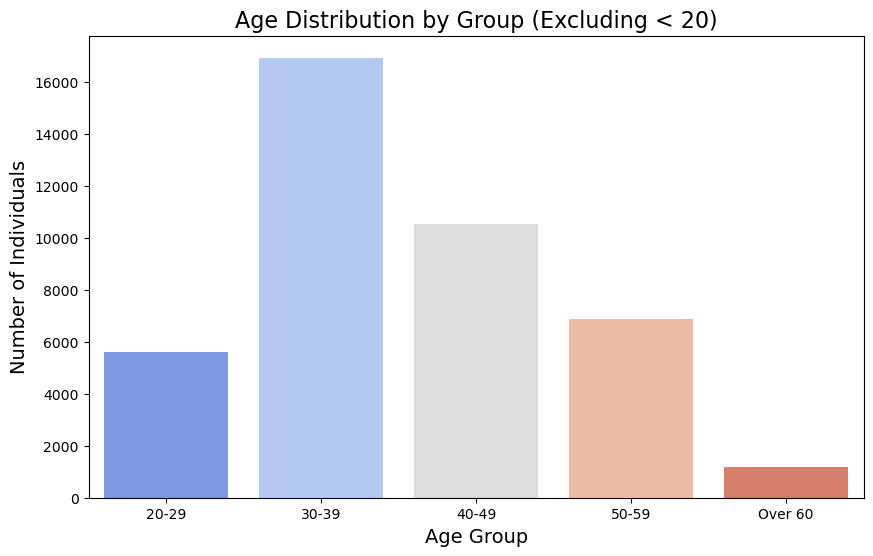

In [59]:
age_group_counts = bank_df['age_group'].value_counts().sort_index()

colors = sns.color_palette("YlOrRd", len(age_group_counts))[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values,
            palette=sns.color_palette("coolwarm", len(age_group_counts)))

plt.title('Age Distribution by Group (Excluding < 20)', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Number of Individuals', fontsize=14)
plt.xticks(rotation=0)
plt.show()

Next let's do the same for the 'job' column.

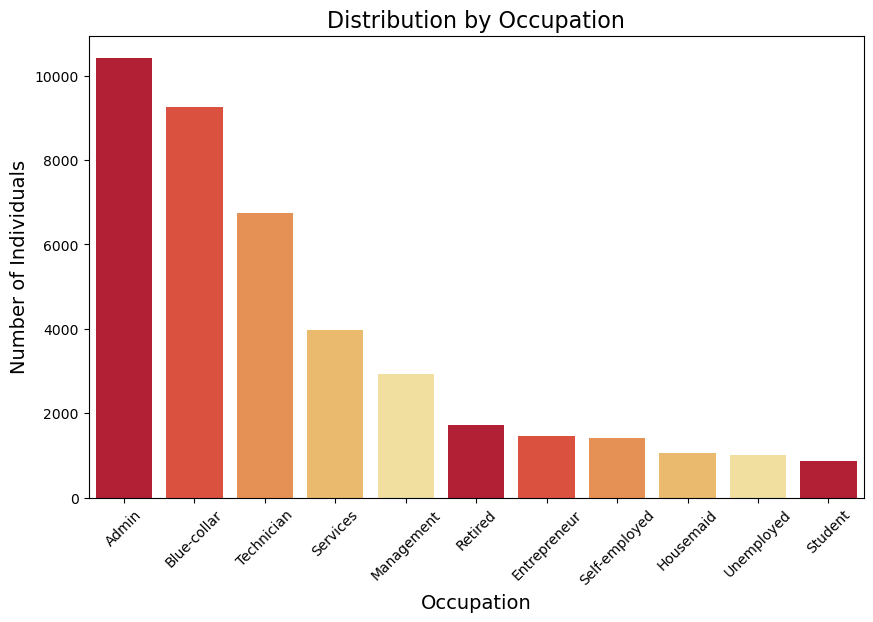

In [50]:
job_counts = bank_df['job'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=job_counts.index, y=job_counts.values, palette=colors)

plt.title('Distribution by Occupation', fontsize=16)
plt.xlabel('Occupation', fontsize=14)
plt.ylabel('Number of Individuals', fontsize=14)
plt.xticks(rotation=45)
plt.show()